In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage



In [3]:
df=pd.read_excel("/content/drive/MyDrive/Excelr/Assignments/DataSets/EastWestAirlines.xlsx",sheet_name=1)

In [4]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [8]:
df = df.drop(columns=["ID#"], errors="ignore")

In [9]:
# Encode categorical variables
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("category").cat.codes

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

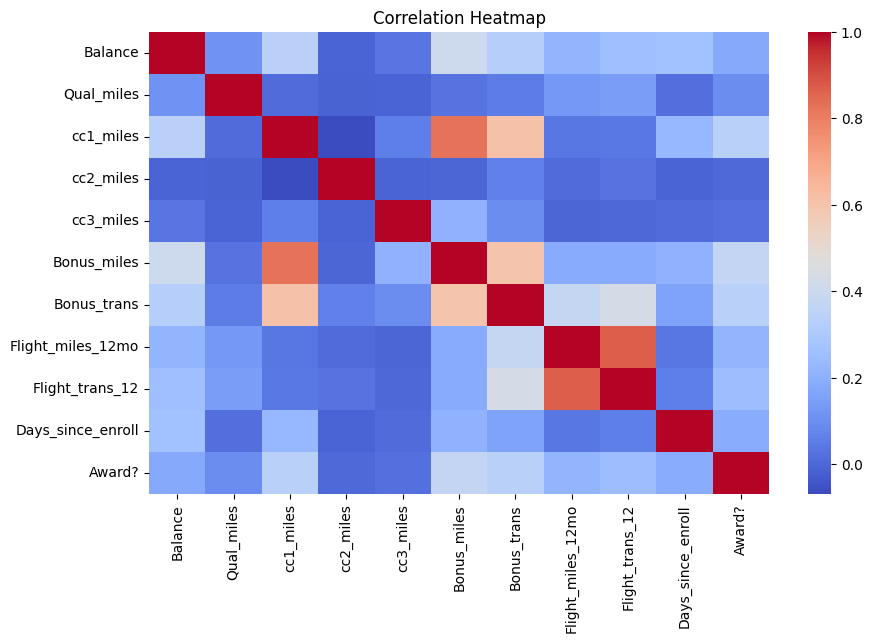

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


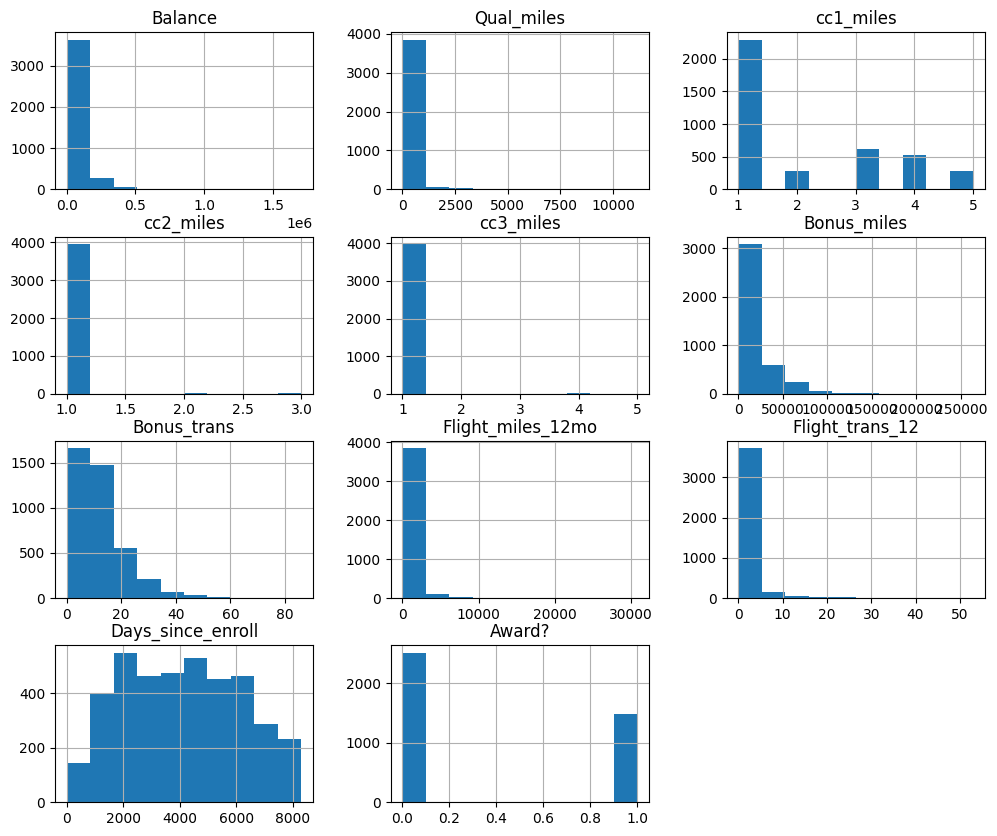

In [12]:
df.hist(figsize=(12,10))
plt.show()


In [13]:
sse = []
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)


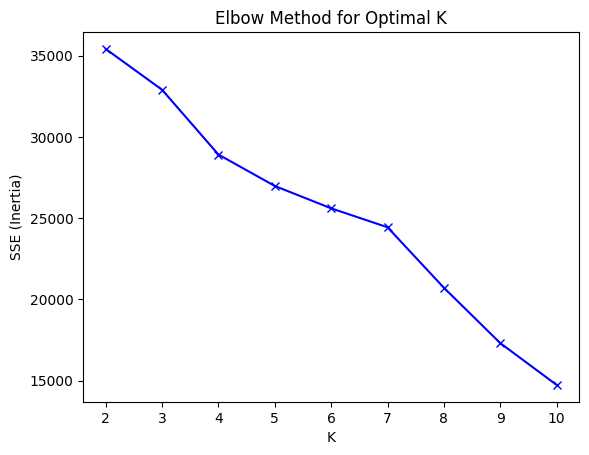

In [14]:
plt.plot(K, sse, 'bx-')
plt.xlabel("K")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [15]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


In [16]:
print("Silhouette Score (KMeans):", silhouette_score(X_scaled, y_kmeans))


Silhouette Score (KMeans): 0.19071186813310886


In [17]:
df["KMeans_Cluster"] = y_kmeans


In [27]:
# DBSCAN
dbscan = DBSCAN(eps=1.8, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)


In [19]:

df["DBSCAN_Cluster"] = y_dbscan
print("DBSCAN Clusters:", np.unique(y_dbscan))


DBSCAN Clusters: [-1  0  1  2  3  4  5]


Silhouette Score (DBSCAN): 0.28835811436000314


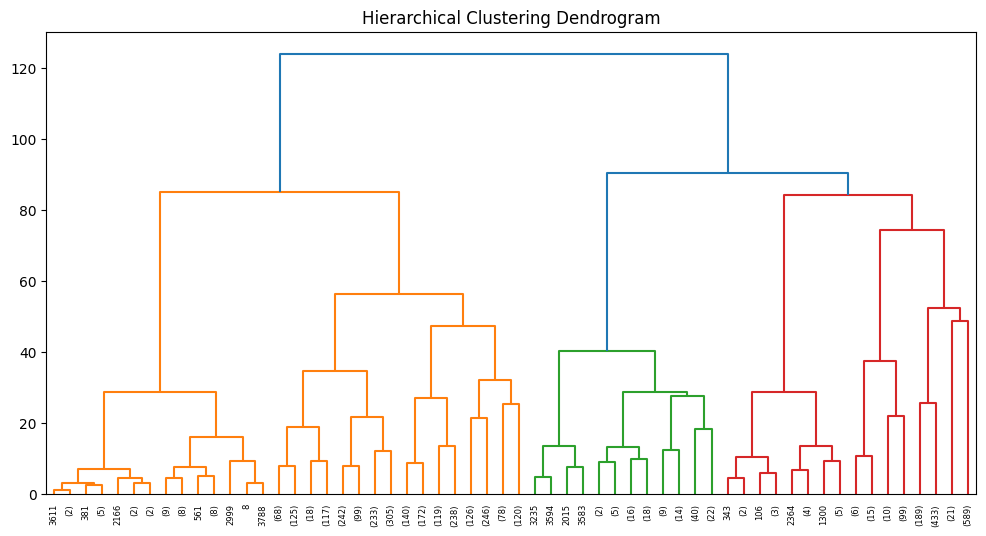

In [20]:
mask = y_dbscan != -1
if len(set(y_dbscan[mask])) > 1:
    print("Silhouette Score (DBSCAN):", silhouette_score(X_scaled[mask], y_dbscan[mask]))
else:
    print("DBSCAN produced too many noise points (-1)")

 Hierarchical Clustering
plt.figure(figsize=(12,6))
linked = linkage(X_scaled, method="ward")
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=4, linkage="ward")
y_hc = hc.fit_predict(X_scaled)



In [21]:

df["Hierarchical_Cluster"] = y_hc


In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


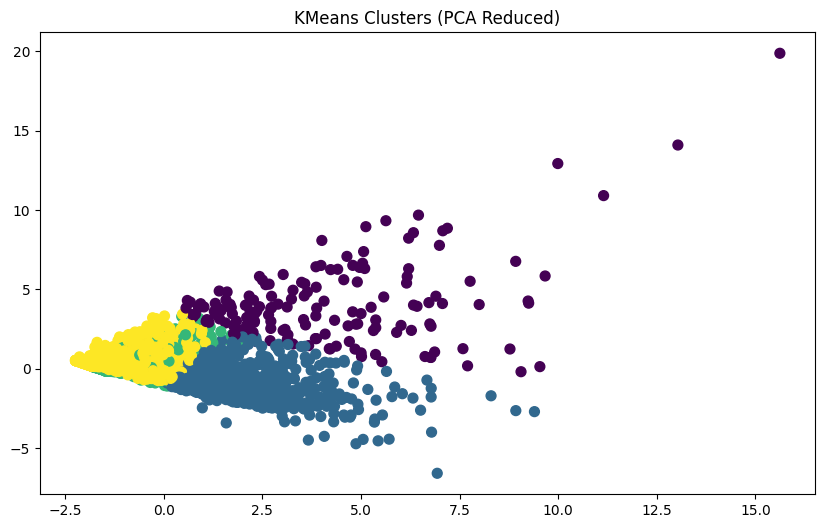

In [24]:

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_kmeans, cmap="viridis", s=50)
plt.title("KMeans Clusters (PCA Reduced)")
plt.show()


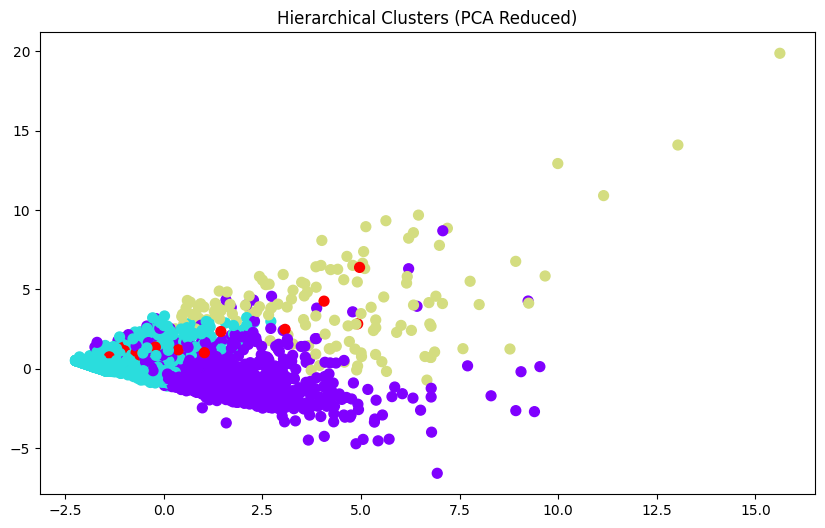

In [25]:

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_hc, cmap="rainbow", s=50)
plt.title("Hierarchical Clusters (PCA Reduced)")
plt.show()


In [26]:

#Cluster Analysis
cluster_summary = df.groupby("KMeans_Cluster").mean()
print(cluster_summary)


                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0               193291.147436  795.455128   2.179487   1.038462   1.000000   
1               122119.899548  151.724887   3.885068   1.002715   1.043439   
2                59693.586570  112.733010   1.372168   1.031553   1.000809   
3                36920.458056   96.690413   1.269640   1.006658   1.000000   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0               32292.288462    27.628205        5530.230769        16.211538   
1               43772.394570    19.398190         366.520362         1.087783   
2                6311.116505     8.456311         258.830097         0.806634   
3                4897.208389     6.790280         167.861518         0.509321   

                Days_since_enroll    Award? 